<a href="https://colab.research.google.com/github/renatabmagro/OutliersNDVI/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Script para identificar e remover valores outliers de um banco de dados. 

Este script contém as etapas:
  - Leitura do banco de dados;
  - Visualização dos dados;
  - Identificação dos valores outliers. 
  - Elaboração de gráficos (boxplot e histograma)
  


    OBS: Este script foi criado inicialmente para identificação dos valores outliers de NDVI - Etapa de trabalho do NDVI com o sensor Flexum (Falker); mas pode ser adaptado para identificar e remover outliers em outras tarefas. 


In [ ]:
#-------Instalação de bibliotecas

install.packages("rgl", dependencies=TRUE)
#-------------------------------------
# pacotes necessários------
install.packages("fBasics")
library(fBasics)
install.packages("tidyverse")
library(tidyverse)
install.packages("sp")
library(sp)
install.packages("rgl", dependencies=TRUE)
library(rgl)
install.packages("plot3D")
library(plot3D)
install.packages("openxlsx")
library(openxlsx)
install.packages("readxl")  
library(readxl)

In [17]:
#-----Declarando funções fora dos pacotes
  # função coeficiente de variação 
cv = function(variavel){
  coef_var = (sd(variavel, na.rm = T)/mean(variavel, na.rm = T))*100
  return(coef_var)
}

In [13]:
#--------Leitura dos dados 
  # Aqui a planilha do excel já contém as coordenadas UTM
  # As colunas com os dados menos relevantes já foram removidas, ou seja, esta planilha contém apenas as coordenadas e o NDVI
# library(readxl)
dados <- read_excel("Embrapa Fito 29.09.2021 .xlsx", 
                   sheet = "SF") # modificar o nome do arquivo e a aba da planilha de interesse conforme a necessidade
View(dados)

dados = dados [complete.cases(dados),] #remoção NAs

Latitude,Longitude,Y,X,NDVI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-28.51541,-50.88175,6845695,511570.9,0.08
-28.51541,-50.88175,6845695,511570.9,0.23
-28.51541,-50.88174,6845696,511571.4,0.24
-28.51541,-50.88174,6845696,511571.4,0.24
-28.51540,-50.88174,6845696,511572.3,0.09
-28.51540,-50.88174,6845696,511572.3,0.21
-28.51540,-50.88173,6845697,511573.2,0.17
-28.51540,-50.88173,6845697,511573.2,0.26
-28.51539,-50.88172,6845697,511574.2,0.16


In [14]:
#-------- Visualização dos dados
names(dados) #nome colunas
head(dados) #primeiras linhas
tail(dados) #ultimas linhas 

[1] "Latitude"  "Longitude" "Y"         "X"         "NDVI"

Latitude,Longitude,Y,X,NDVI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-28.51541,-50.88175,6845695,511570.9,0.08
-28.51541,-50.88175,6845695,511570.9,0.23
-28.51541,-50.88174,6845696,511571.4,0.24
-28.51541,-50.88174,6845696,511571.4,0.24
-28.51540,-50.88174,6845696,511572.3,0.09
-28.51540,-50.88174,6845696,511572.3,0.21


Latitude,Longitude,Y,X,NDVI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-28.51517,-50.88075,6845722,511668.7,0.06
-28.51517,-50.88075,6845722,511668.7,0.14
-28.51516,-50.88074,6845722,511669.5,0.13
-28.51516,-50.88074,6845722,511669.5,0.22
-28.51516,-50.88073,6845723,511670.4,0.13
-28.51516,-50.88073,6845723,511670.4,0.16


In [15]:
#----- Selecionar os atributos de interesse em um mesmo data frame 
# Cria um novo dataframe apenas com os dados que interessam
atr_projeto = data.frame(Lat=dados$Latitude,
                         Long=dados$Longitude,
                         NDVI=dados$NDVI)

In [18]:
#----- Cálculos estatísticos
cv = data.frame(estat_NDVI = cv(atr_projeto$NDVI))
estat_final = data.frame(estat_NDVI = basicStats(atr_projeto$NDVI))

names(estat_final)<-c('estat_NDVI')
estat_completo <- rbind(estat_final, cv)

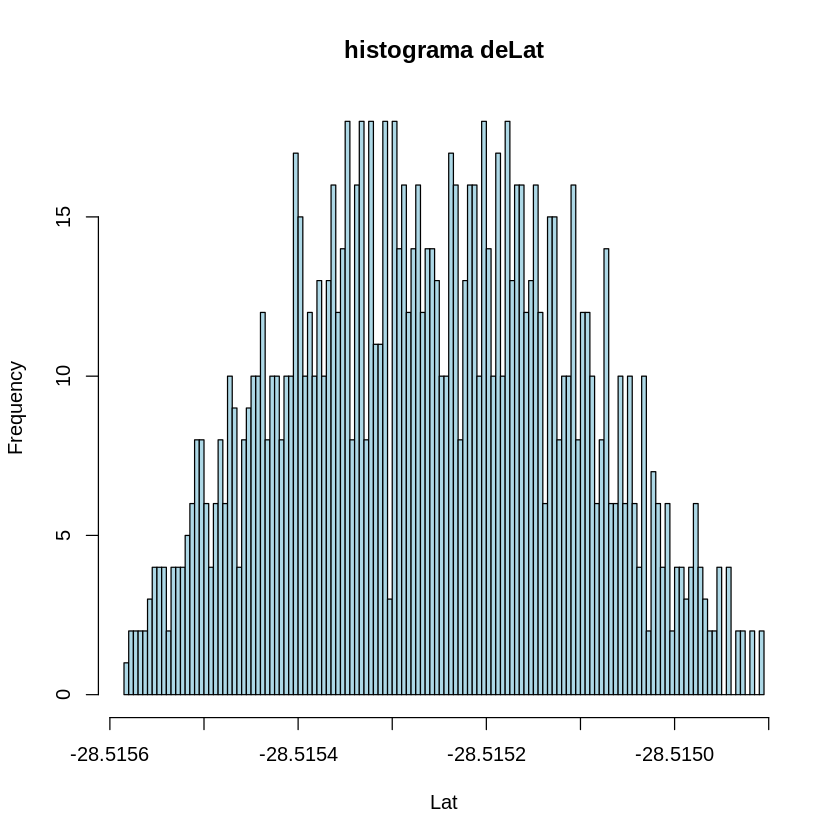

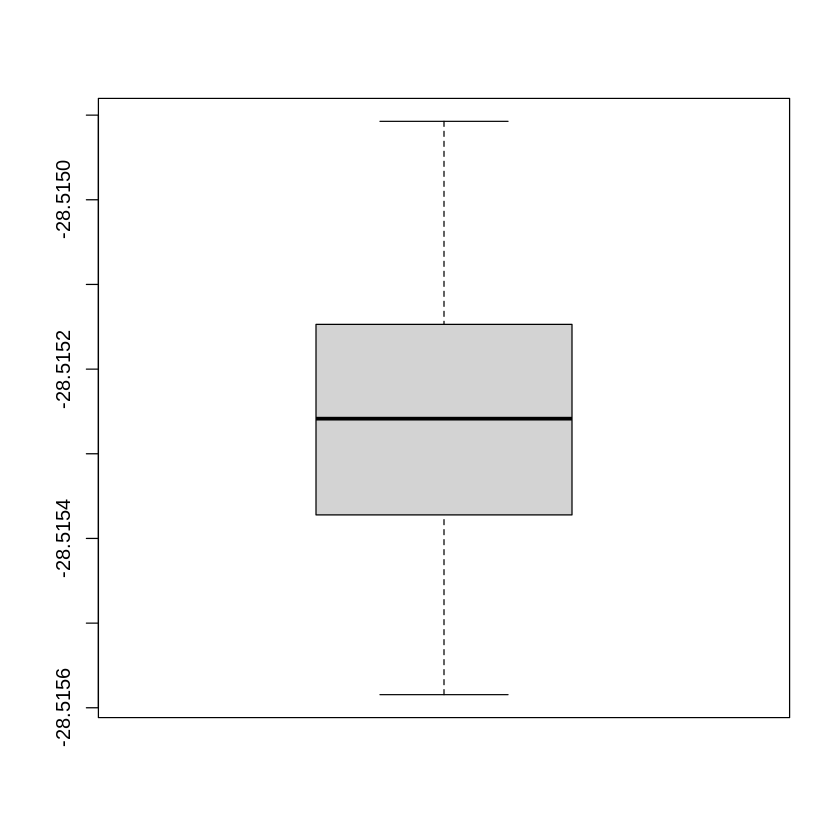

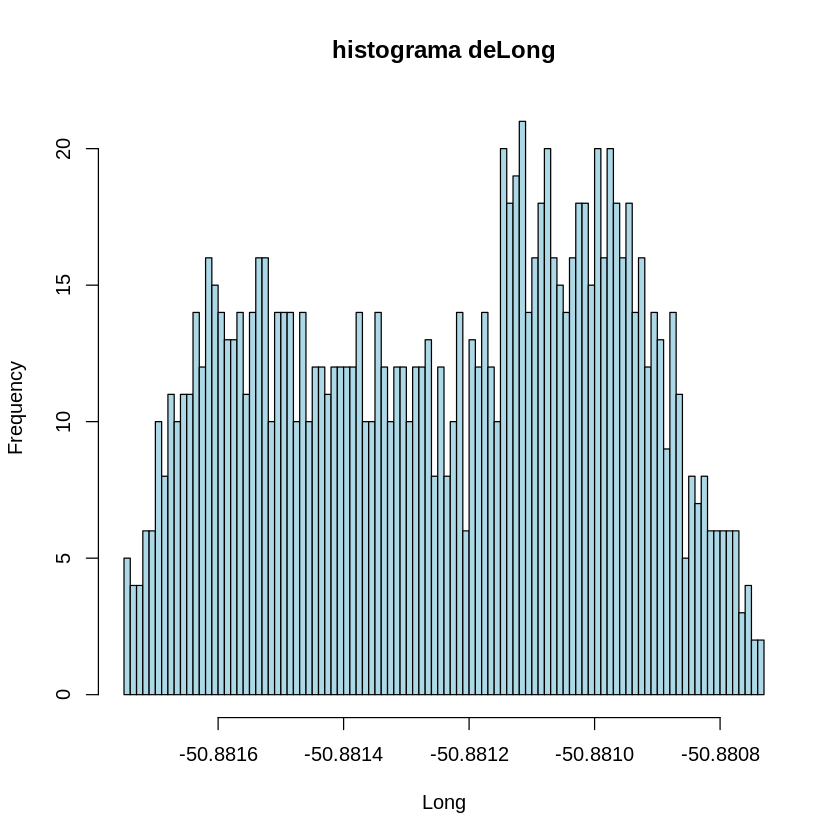

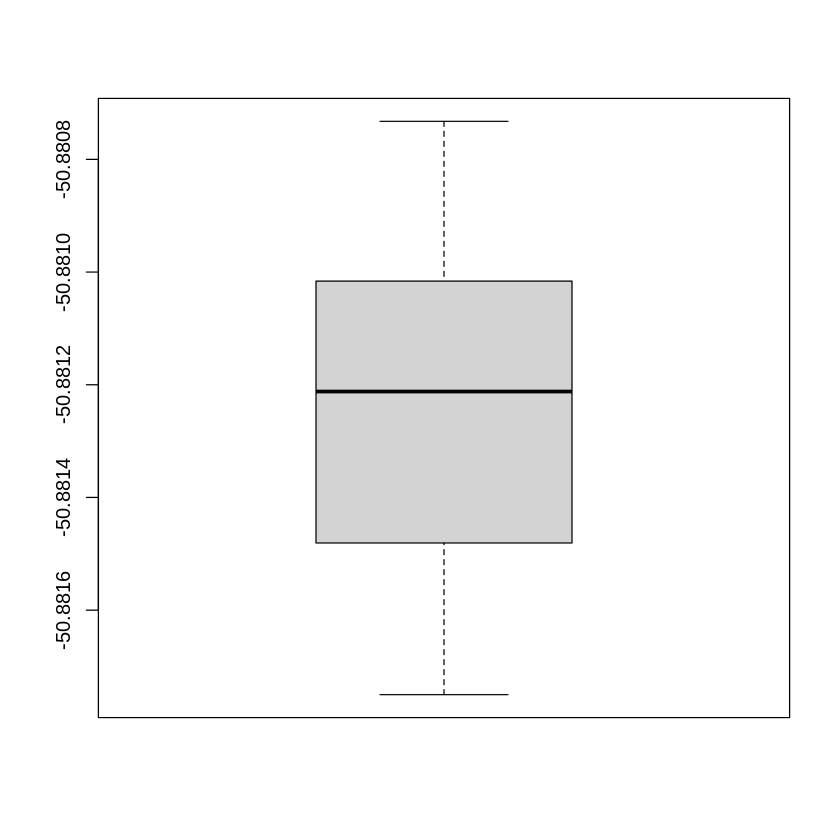

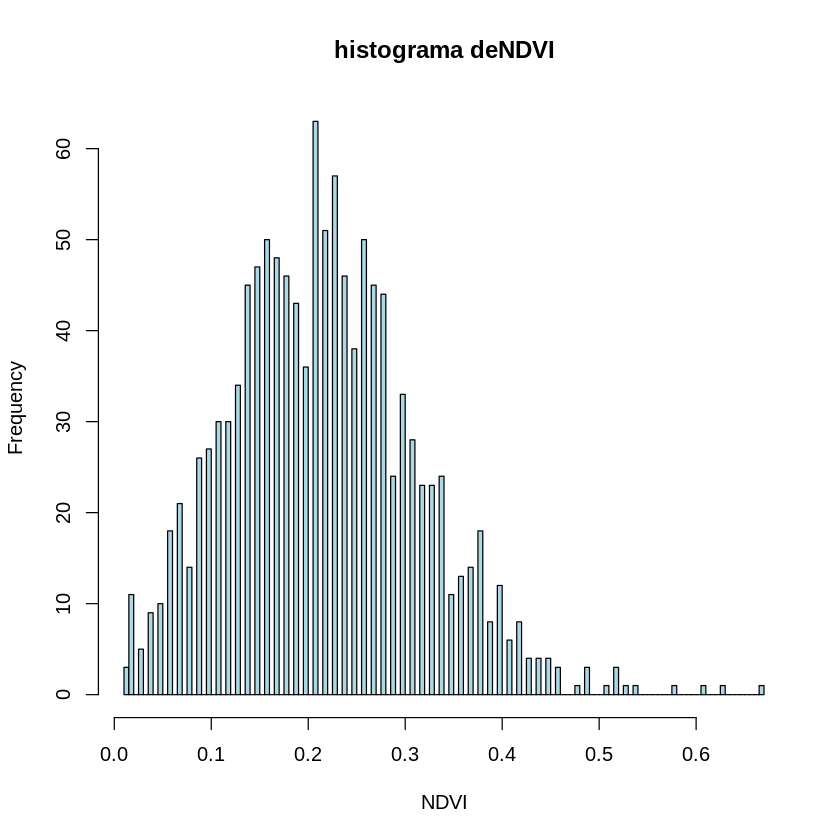

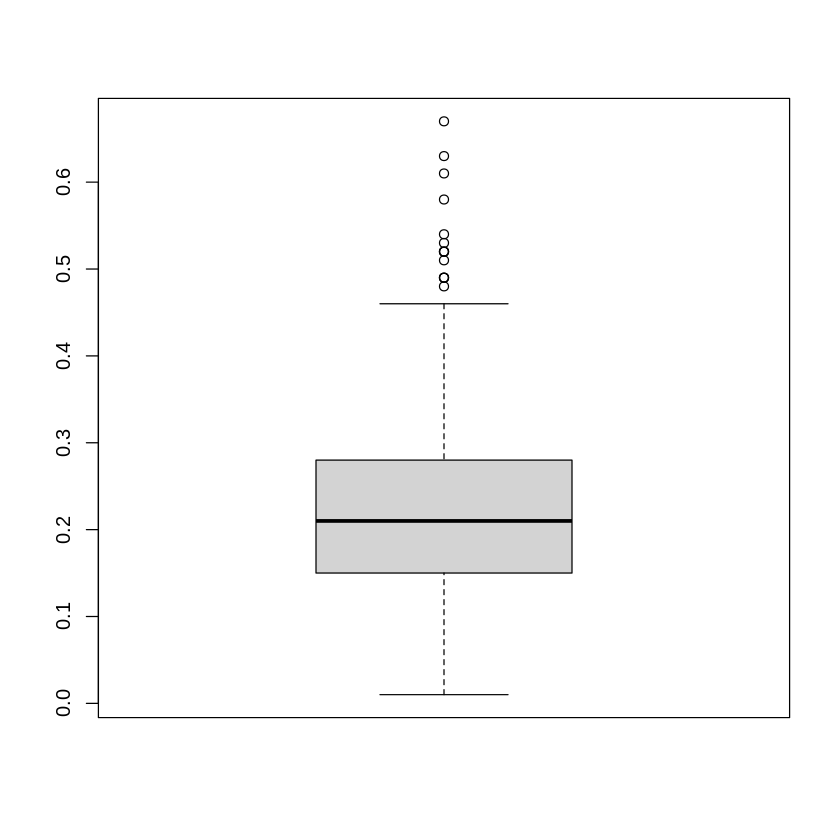

In [19]:
#plotagem dos histogramas e boxplots-----------------
lst1<- lapply(names(atr_projeto), function(i) {hist(atr_projeto[,i],100,
                                                    col="lightblue",
                                                    main=paste0("histograma de", i),
                                                    xlab=i); boxplot(atr_projeto[,i])})



[1] 0.51 0.52 0.67 0.52 0.61 0.48 0.53 0.49 0.49 0.54 0.58 0.49 0.63 0.52

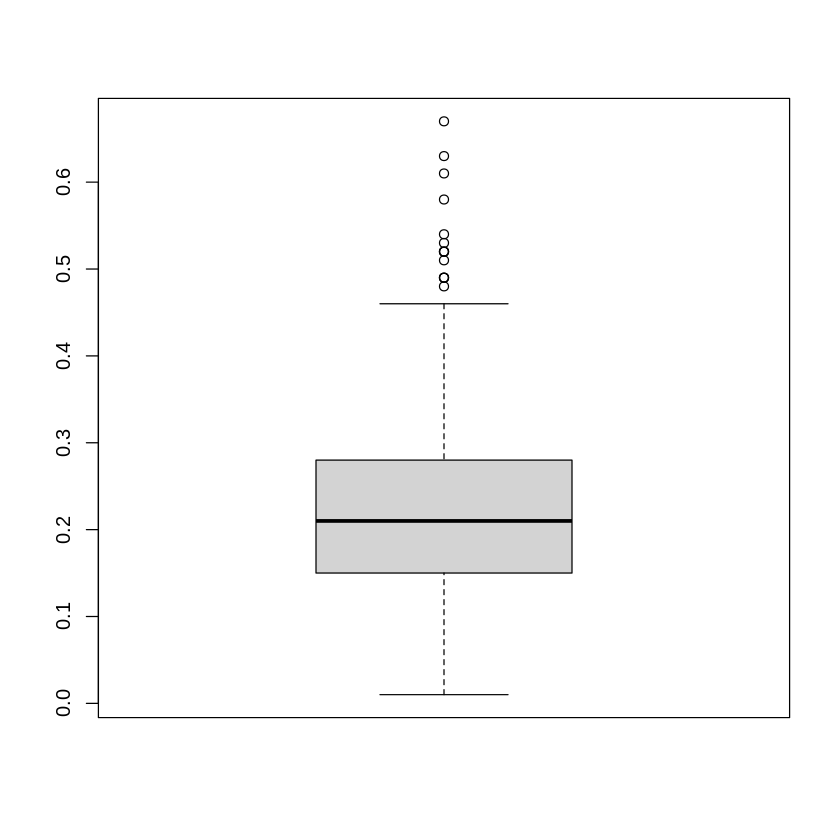

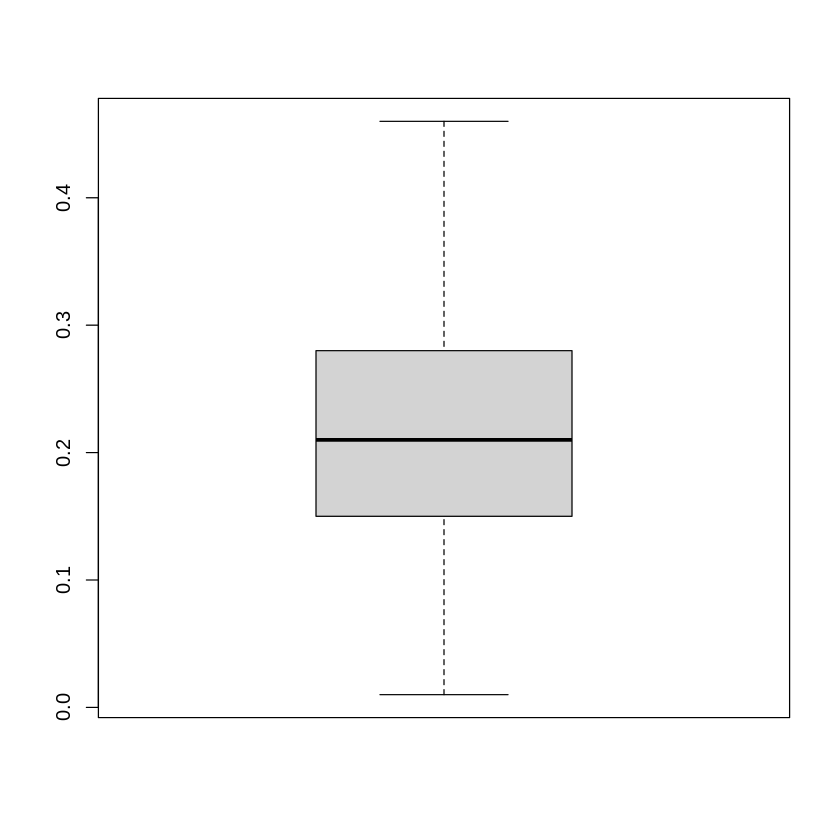

In [20]:
boxplot(atr_projeto$NDVI, outline = T) #mapa com outliers
boxplot(atr_projeto$NDVI)$out # mostra os valores que são outliers no console - posso ir no arquivo excel, filtrar os valores manuelamente e excluí-los. 
                              # também pode ser feita a filtragem manual no Qgis, para avaliar espacialmente os valores e concluir se são outliers ou não.

boxplot(atr_projeto$NDVI, outline = F) #mapa sem outliers

[1] 14

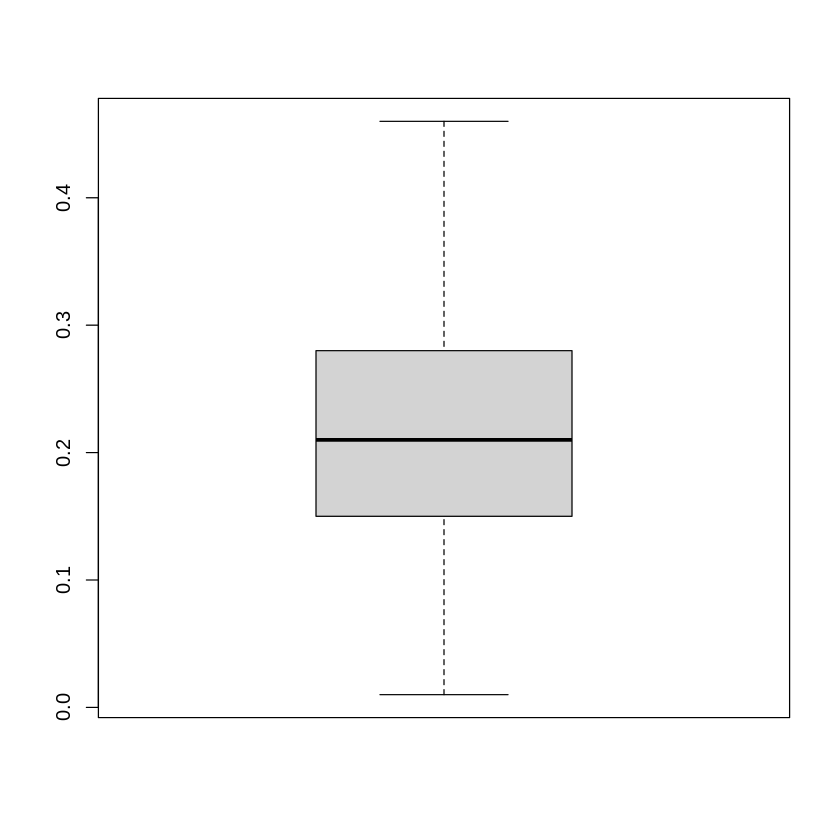

In [21]:
# Etapa para remoção automática dos valores outliers 
# Contudo, não é criada uma nova planilha no excel.. então é útil apenas se o interesse é continuar trabalhando com os dados no ambiente do R. 

remove_outlier <- atr_projeto$NDVI[!atr_projeto$NDVI %in% boxplot.stats(atr_projeto$NDVI)$out]    # Remove automaticamente os outliers
length(atr_projeto$NDVI) - length(remove_outlier)                   # Contagem dos outliers
boxplot(remove_outlier)                              # Boxplot sem os outliers